---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

# Load Data

In [1]:
import plotly.graph_objects as go

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/linahourieh/Michigan-Track/main/train.csv',encoding='cp1252')
df_test = pd.read_csv('https://raw.githubusercontent.com/linahourieh/Michigan-Track/main/datasets/test.csv')
#df_address = pd.read_csv('/content/addresses.csv',encoding='cp1252')
df_latlons = pd.read_csv('https://raw.githubusercontent.com/linahourieh/Michigan-Track/main/datasets/latlons.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [4]:
df.shape

(250306, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [6]:
df['compliance'].value_counts(dropna=False)

0.0    148283
NaN     90426
1.0     11597
Name: compliance, dtype: int64

In [7]:
df_des = df.describe()
df_des

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000000,2.503060e+05,0.0,2.467040e+05,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,1.064986e+04,NaN,9.149788e+03,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,77189.882881,3.188733e+04,NaN,3.602034e+04,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,4.739000e+03,NaN,5.440000e+02,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,1.024400e+04,NaN,2.456000e+03,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,219888.750000,1.576000e+04,NaN,1.292725e+04,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,366178.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [8]:
df_test.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status'],
      dtype='object')

In [9]:
df_test['violation_code'].value_counts()

9-1-104               16259
22-2-88(b)            15699
9-1-36(a)              8653
22-2-45                2844
9-1-111                2246
                      ...  
61-83.0100/32.0031        1
22-2-55                   1
9-1-469                   1
9-1-471                   1
61-4-33                   1
Name: violation_code, Length: 151, dtype: int64

In [10]:
to_drop = []
for i in range(len(list(df.columns))):
  if list(df.columns)[i] not in list(df_test.columns):
    #print(list(df.columns)[i])
    to_drop.append(list(df.columns)[i])
to_drop.pop()
print(to_drop)

['payment_amount', 'balance_due', 'payment_date', 'payment_status', 'collection_status', 'compliance_detail']


In [11]:
df.isna().sum()

ticket_id                          0
agency_name                        0
inspector_name                     0
violator_name                     34
violation_street_number            0
violation_street_name              0
violation_zip_code            250306
mailing_address_str_number      3602
mailing_address_str_name           4
city                               0
state                             93
zip_code                           1
non_us_str_code               250303
country                            0
ticket_issued_date                 0
hearing_date                   12491
violation_code                     0
violation_description              0
disposition                        0
fine_amount                        1
admin_fee                          0
state_fee                          0
late_fee                           0
discount_amount                    0
clean_up_cost                      0
judgment_amount                    0
payment_amount                     0
b

In [12]:
threshold = 250306 * 50 //100 
for i in range(len(df.isna().sum().values)):
  if df.isna().sum().values[i] > threshold and df.isna().sum().index[i] not in to_drop:
    to_drop.append(df.isna().sum().index[i])

In [13]:
to_drop

['payment_amount',
 'balance_due',
 'payment_date',
 'payment_status',
 'collection_status',
 'compliance_detail',
 'violation_zip_code',
 'non_us_str_code',
 'grafitti_status']

## df_copy

In [28]:
df_copy = df.copy()
df_copy.drop(columns=to_drop, inplace=True)

In [29]:
df_copy.isna().sum()

ticket_id                         0
agency_name                       0
inspector_name                    0
violator_name                    34
violation_street_number           0
violation_street_name             0
mailing_address_str_number     3602
mailing_address_str_name          4
city                              0
state                            93
zip_code                          1
country                           0
ticket_issued_date                0
hearing_date                  12491
violation_code                    0
violation_description             0
disposition                       0
fine_amount                       1
admin_fee                         0
state_fee                         0
late_fee                          0
discount_amount                   0
clean_up_cost                     0
judgment_amount                   0
compliance                    90426
dtype: int64

In [30]:
# zip_code = int
# ticket_issued_date = date
# hearing_date = date
df_copy.dtypes

ticket_id                       int64
agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
compliance                    float64
dtype: object

## zip_code

In [56]:
from tqdm import tqdm

for j in tqdm(range(df_copy.shape[0])):
  try:
    int(df_copy['zip_code'][j])
    a = str(df_copy['zip_code'][j])[:5]
    df_copy['zip_code'][j] = int(a)
  except:
    df_copy['zip_code'][j] = np.nan

  0%|          | 0/250306 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
 17%|█▋        | 42353/250306 [00:46<03:31, 981.56it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 250306/250306 [05:00<00:00, 833.26it/s]


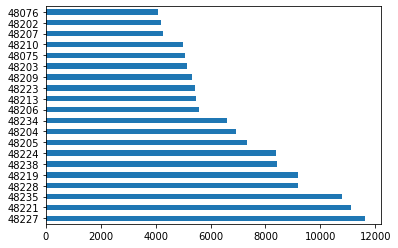

In [69]:
df_copy['zip_code'].value_counts()[:20].plot(kind='barh')

In [71]:
df_copy['zip_code'].isna().sum()

89

## City

In [81]:
pd.set_option('display.max_rows', None)

In [86]:
for j in range(10):
  df_copy['city_3'] = df_copy['city'].str.upper()[j][:3])

CHI
DET
DET
DET
DET
LOG
CLI
DET
DET
DET


In [87]:
for j in tqdm(range(df_copy.shape[0])):
  df_copy['city_3'] = df_copy['city'].str.upper()[j][:3]

  0%|          | 202/250306 [00:17<6:08:38, 11.31it/s]


KeyboardInterrupt: ignored

In [83]:
df_copy['city'].str.upper().value_counts().sort_index().shape

(4324,)

In [111]:
categorical_var = df_copy.dtypes[df_copy.dtypes == 'object'].index.to_list()

In [119]:
 df_copy.dtypes[df_copy.dtypes != 'object']

ticket_id                       int64
violation_street_number       float64
mailing_address_str_number    float64
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
compliance                    float64
dtype: object

In [114]:
numerical_var = df_copy.dtypes[df_copy.dtypes != 'object'].index.to_list()

# Catgorical Cleaning

In [115]:
df_copy[categorical_var]

,agency_name,inspector_name,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition
0,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",TYLER,S. WICKER,CHICAGO,IL,60606,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default
1,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",CENTRAL,Martin Luther King,Detroit,MI,48208,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination
2,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",LONGFELLOW,P.O. BOX,DETROIT,MI,48223,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal
3,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",LONGFELLOW,ST. CLAIR,DETROIT,MI,48214,USA,2004-04-26 13:30:00,NaN,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal
4,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",CHURCHILL,CHURCHILL,DETROIT,MI,48206,USA,2004-04-26 13:00:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,SANTA MARIA,MEYERS,DETROIT,MI,48235,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal
250302,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,MEYERS RD,MEYERS,DETROIT,MI,48235,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal
250303,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,MEYERS RD,MEYERS,DETROIT,MI,48235,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal
250304,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,MEYERS RD,MEYERS,DETROIT,MI,48235,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal


In [ ]:
import pandas as pd
import numpy as np

def blight_model():
    
    # Your code here
    
    return # Your answer here

In [ ]:
blight_model()